In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from m5py import M5Prime, export_text_m5
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [2]:
df = pd.read_excel("D:\BTP\Gopalkheda and yerli\Combined model\combined.xlsx")
df

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
0,1977,6,1,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.15,0.000000,0.00,0.00,0.00
1,1977,6,2,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.0,0.0,0.15,34.147357,34.10,33.25,33.95
2,1977,6,3,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.0,0.15,33.897445,33.60,33.05,33.85
3,1977,6,4,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.3,0.15,34.300330,34.35,33.55,34.30
4,1977,6,5,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.3,0.15,35.223726,34.90,34.45,35.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0083,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.00,33.078998,33.55,33.60,33.15
16067,2021,5,28,0.0,0.0000,0.0,0.0,0.0,5.2,0.0,...,0.0083,0.0000,0.0,0.0,0.0,0.00,32.852387,33.30,33.30,32.80
16068,2021,5,29,0.0,0.1713,0.4,0.0,0.0,0.0,5.2,...,0.0000,0.0083,0.0,0.0,0.0,0.00,33.126443,33.30,33.25,33.15
16069,2021,5,30,0.0,1.0604,1.2,0.4,0.0,0.0,0.0,...,0.1713,0.0000,0.0,0.0,0.0,0.00,33.681231,34.05,33.95,34.00


In [3]:
df1 = df[0:12418]
df2 = df[12418:]
df1

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
0,1977,6,1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.15,0.000000,0.00,0.00,0.00
1,1977,6,2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.15,34.147357,34.10,33.25,33.95
2,1977,6,3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.0,0.15,33.897445,33.60,33.05,33.85
3,1977,6,4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.3,0.15,34.300330,34.35,33.55,34.30
4,1977,6,5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.3,0.15,35.223726,34.90,34.45,35.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,2011,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,32.227197,31.90,31.95,32.60
12414,2011,5,28,0.0,0.0,0.0,0.0,0.0,1.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,34.000740,34.20,33.50,33.95
12415,2011,5,29,0.0,0.0,0.0,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.00,34.003303,34.15,33.75,34.20
12416,2011,5,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,34.703793,35.10,34.90,34.80


In [4]:
df2

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
12418,2011,6,1,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,34.825286,35.00,34.10,34.75
12419,2011,6,2,0.0,0.0735,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,33.899992,34.25,33.55,33.70
12420,2011,6,3,0.0,0.4980,0.0,0.0,0.0,4.9,0.0,...,0.0735,0.0000,0.0,0.0,0.0,0.0,33.400491,33.65,33.35,33.30
12421,2011,6,4,0.0,0.0415,0.0,0.0,0.0,2.0,4.9,...,0.4980,0.0735,0.0,0.0,0.0,0.0,31.123140,31.15,30.40,30.95
12422,2011,6,5,0.0,0.0000,0.0,0.0,0.0,0.0,2.0,...,0.0415,0.4980,0.0,0.0,0.0,0.0,29.703559,29.45,29.95,30.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0083,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,33.078998,33.55,33.60,33.15
16067,2021,5,28,0.0,0.0000,0.0,0.0,0.0,5.2,0.0,...,0.0083,0.0000,0.0,0.0,0.0,0.0,32.852387,33.30,33.30,32.80
16068,2021,5,29,0.0,0.1713,0.4,0.0,0.0,0.0,5.2,...,0.0000,0.0083,0.0,0.0,0.0,0.0,33.126443,33.30,33.25,33.15
16069,2021,5,30,0.0,1.0604,1.2,0.4,0.0,0.0,0.0,...,0.1713,0.0000,0.0,0.0,0.0,0.0,33.681231,34.05,33.95,34.00


In [5]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.639102853449456 98.16631600898204


In [6]:
# import graphviz 
# dot_data = tree.export_graphviz(model, out_file=None, 
#                               feature_names=df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)"]].columns,  
#                               class_names=df2.Discharge,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph 

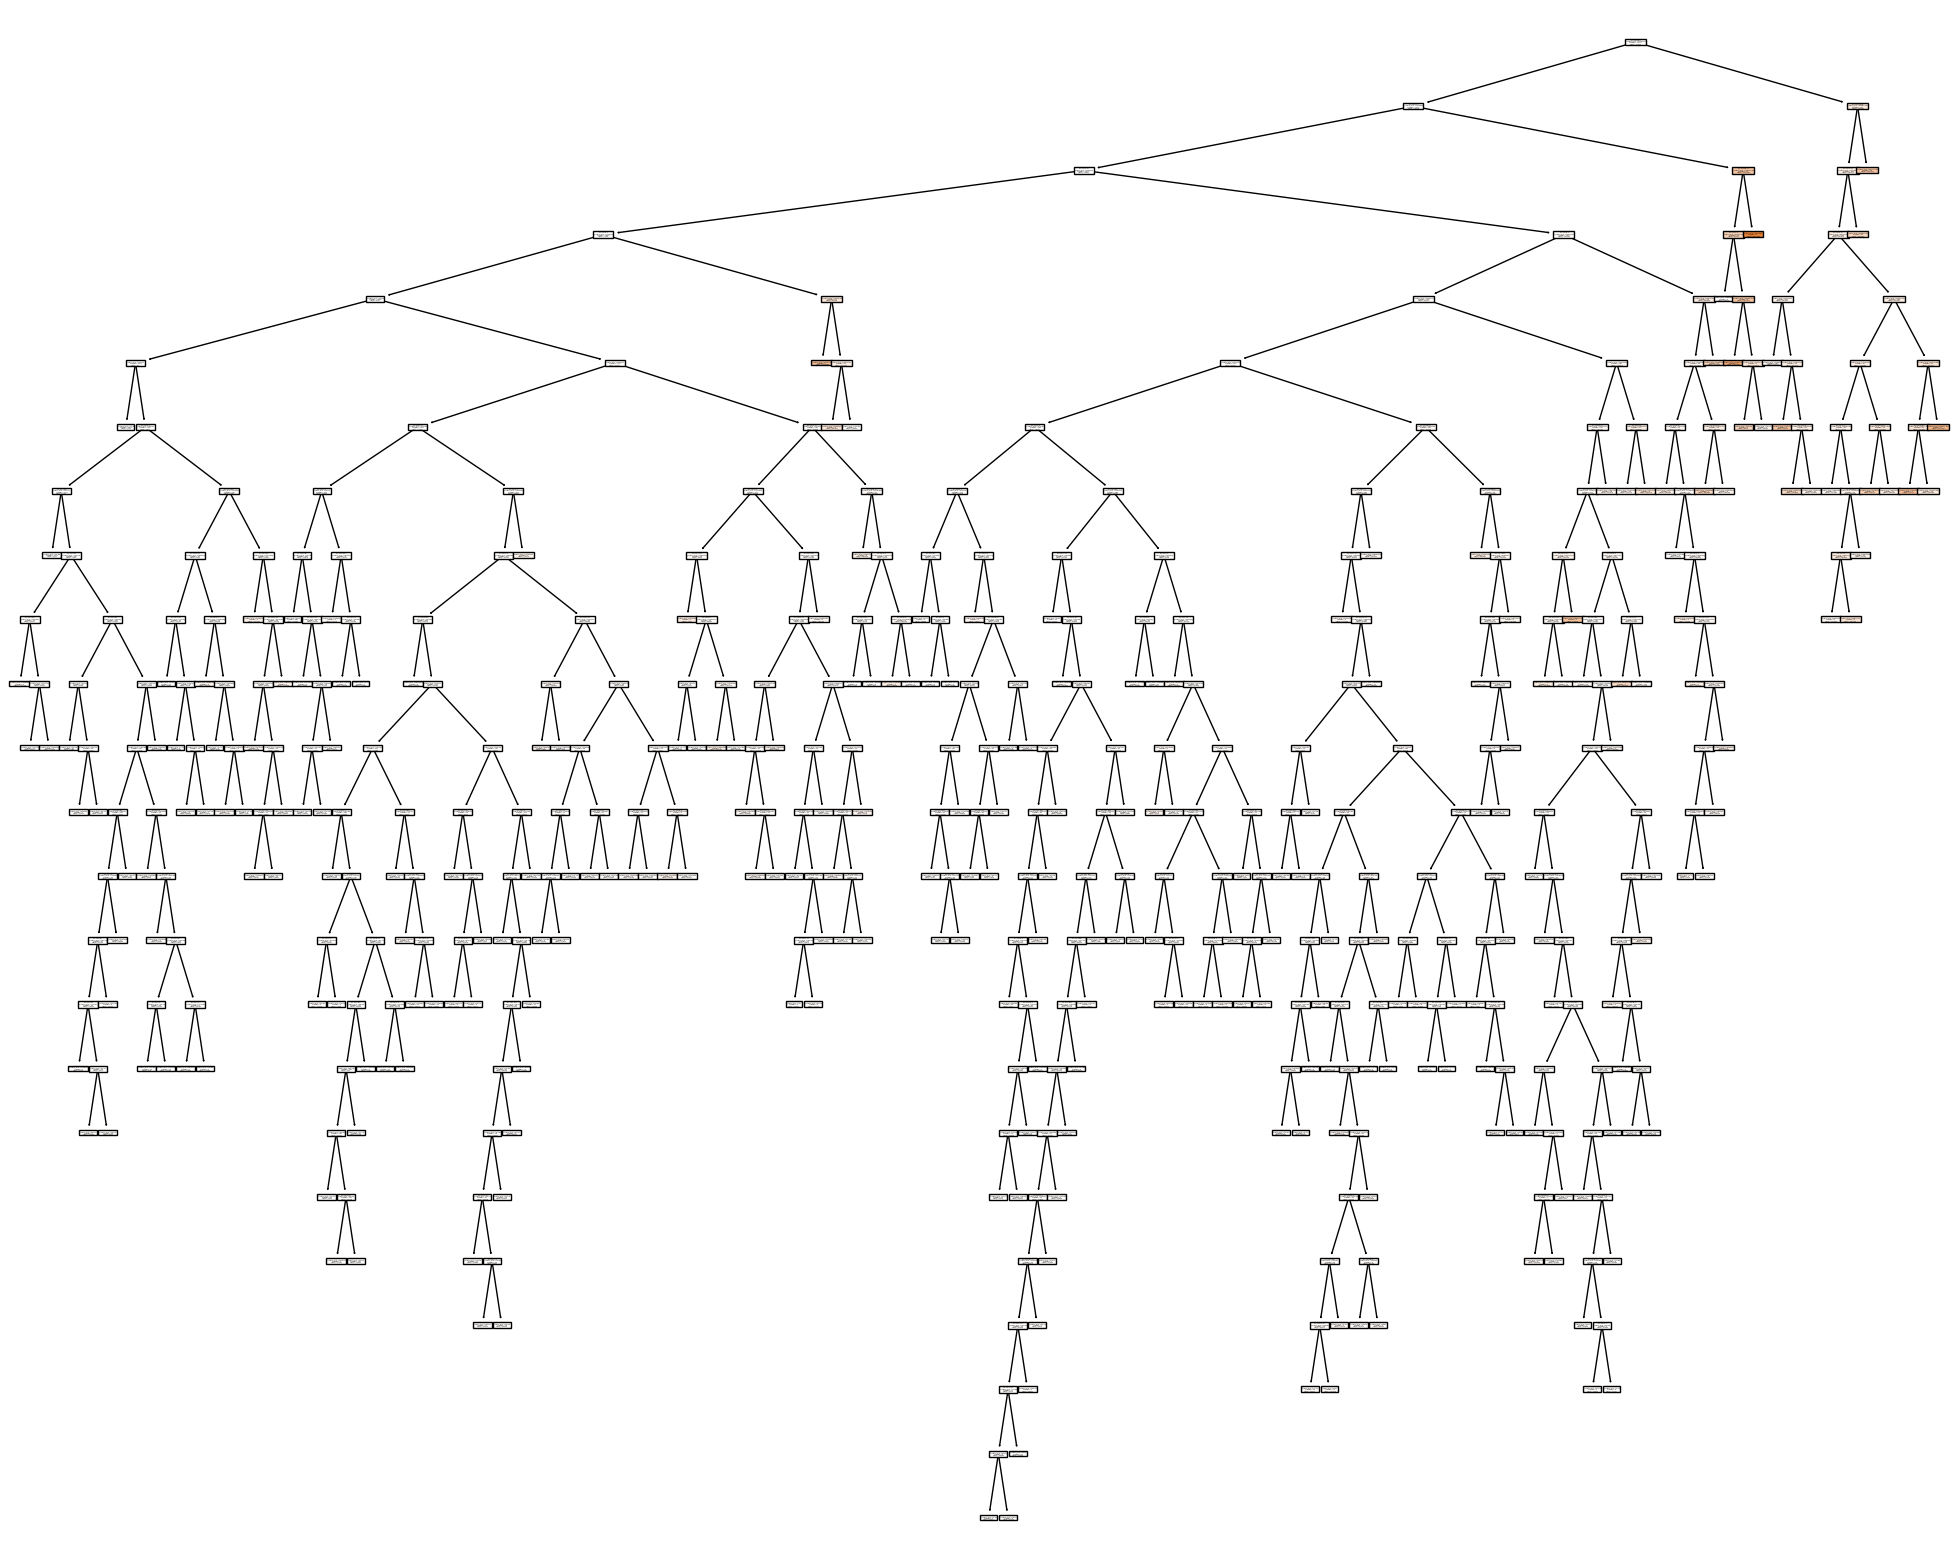

In [7]:
model1 = M5Prime(use_pruning = True, use_smoothing = True)
model1.fit(df1[["Q(t-1)"]].values,df1.Discharge.values)
predicted = model1.predict(df2[["Q(t-1)"]].values)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df1.Discharge,  
                   class_names=df1[["Q(t-1)"]],
                   filled=True)

## P S

In [8]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7020518484367069 89.19512462728032


In [9]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6997271676551307 89.5424120815482


In [10]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7307399609993781 84.7923596254516


In [11]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.741826011969028 83.0284653237708


In [12]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7544250098476135 80.97721505751691


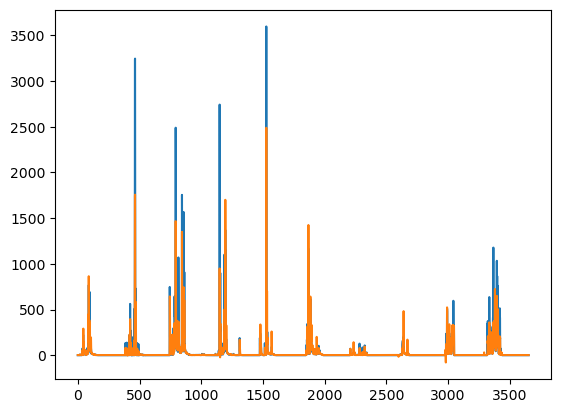

In [13]:
sz = df2.Discharge.size
plt.plot(range(sz), df2.Discharge)
plt.plot(range(sz), predicted)

#without base flow

In [14]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)","T10(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)","T10(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6278023192103903 99.69137825382033


In [15]:
model = M5Prime(use_pruning = True, use_smoothing = True)
model.fit(df1[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6804246803134973 92.3756239691579


## P US

In [16]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.41477191408057124 125.00671684733166


In [17]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.526493832788911 112.44330155489266


In [18]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5767753929601795 106.30561985254498


In [19]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5908902393783293 104.51790343777284


In [20]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6457075366927023 97.26391037792476


In [21]:
model = M5Prime(use_pruning = True, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5958157772219417 103.88681875023526


## UP S

In [22]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5850358621653163 105.26307476103041


In [23]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7062369995519535 88.56646618286396


In [24]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6914974620538762 90.7611812394554


In [25]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7272106359796492 85.34625825706074


In [26]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7426342966144139 82.89839171794017


In [27]:
model = M5Prime(use_pruning = False, use_smoothing = True)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.7459415265120182 82.3640343533996


## UP US

In [28]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5570176244437974 108.7586962471714


In [29]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5777836913829622 106.17891206574639


In [30]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values,df1.Discharge.values)
predicted = model.predict(df2[["RF101","base flow","Q(t-1)","Q(t-2)","RF80"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.6051311083076711 102.68268807442718


In [31]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5901309625699378 104.61484714491823


In [32]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.5670195557406936 107.5238756083127


In [33]:
model = M5Prime(use_pruning = False, use_smoothing = False)
model.fit(df1[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values,df1.Discharge.values)
predicted = model.predict(df2[["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]].values)
print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

0.557254175204595 108.7296540220183


In [34]:
combinations = [
    ["Lump temp(t-1)","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"],
    ["RF101","base flow","Q(t-1)","Q(t-2)","RF117(t-1)"],
    ["RF101","base flow","Q(t-1)","Q(t-2)","RF80"],
    ["base flow","Q(t-1)","Q(t-2)","T5(t-1)","cluster"],
    ["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster"],
    ["base flow","Q(t-1)","Q(t-2)","Q(t-3)","cluster","RF117(t-2)"]
               ]

In [35]:
for i in combinations:
    model = M5Prime(use_pruning = True, use_smoothing = True)
    model.fit(df1[i].values,df1.Discharge.values)
    predicted = model.predict(df2[i].values)
    print(i)
    print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))
    print()

['Lump temp(t-1)', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.6771181148936076 92.8522878304701

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.7072339221093433 88.4160576147426

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF80']
0.6814833992428042 92.22248173598648

['base flow', 'Q(t-1)', 'Q(t-2)', 'T5(t-1)', 'cluster']
0.7271188339387198 85.36061787415247

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster']
0.7471239539804109 82.17214333673144

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster', 'RF117(t-2)']
0.7457446513239253 82.39594097381284



In [36]:
for i in combinations:
    model = M5Prime(use_pruning = True, use_smoothing = False)
    model.fit(df1[i].values,df1.Discharge.values)
    predicted = model.predict(df2[i].values)
    print(i)
    print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))
    print()

['Lump temp(t-1)', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
-1.6687873140122056 266.94866370340264

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.5103171511059482 114.3479058719902

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF80']
0.5931732280453992 104.22587055038824

['base flow', 'Q(t-1)', 'Q(t-2)', 'T5(t-1)', 'cluster']
0.5834345507944145 105.46597983465219

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster']
0.6431730593430132 97.61118545024223

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster', 'RF117(t-2)']
0.5954614301770191 103.93234739837719



In [37]:
for i in combinations:
    model = M5Prime(use_pruning = False, use_smoothing = True)
    model.fit(df1[i].values,df1.Discharge.values)
    predicted = model.predict(df2[i].values)
    print(i)
    print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))
    print()

['Lump temp(t-1)', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.6847773252134443 91.74438502004148

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.7030015938224756 89.05285109185778

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF80']
0.6939792602284761 90.39537260843782

['base flow', 'Q(t-1)', 'Q(t-2)', 'T5(t-1)', 'cluster']
0.7284509018574682 85.15201930002158

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster']
0.737674049576309 83.69343569543683

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster', 'RF117(t-2)']
0.7432831836577765 82.79382137275394



In [38]:
for i in combinations:
    model = M5Prime(use_pruning = False, use_smoothing = False)
    model.fit(df1[i].values,df1.Discharge.values)
    predicted = model.predict(df2[i].values)
    print(i)
    print(r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))
    print()

['Lump temp(t-1)', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.5579442676229227 108.6448844245214

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF117(t-1)']
0.5786227892750744 106.07335146879049

['RF101', 'base flow', 'Q(t-1)', 'Q(t-2)', 'RF80']
0.6222387795561545 100.43369834408647

['base flow', 'Q(t-1)', 'Q(t-2)', 'T5(t-1)', 'cluster']
0.5830064157801169 105.52016349641274

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster']
0.5622399052776184 108.11572221557483

['base flow', 'Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'cluster', 'RF117(t-2)']
0.5518386891584849 109.39260131171412

